In [37]:
import matplotlib.pyplot as p
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import numpy as np
import hyperspy.api as hs
import atomap.api as am
import pathlib as Path

In [2]:
path = "4DSTEM/Datos/s_adf_IFFT.tif"
path2 = "Datos/Vacantes WS2/09_AVG_DF.tif"

s = hs.load(path)

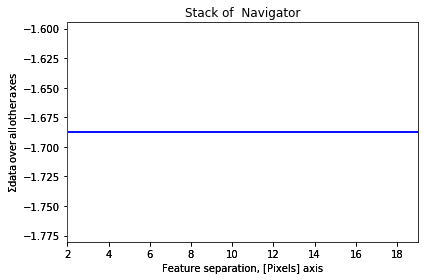

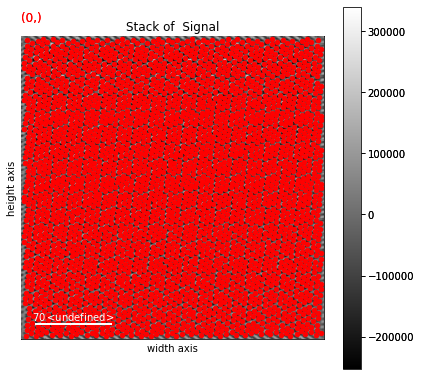

In [3]:
s_peaks = am.get_feature_separation(s, separation_range=(2, 20), show_progressbar=False)
s_peaks.plot()

In [4]:
atom_positions = am.get_atom_positions(s, separation=3)

In [5]:
sublattice = am.Sublattice(atom_positions, image=s.data)
sublattice

<Sublattice,  (atoms:3213,planes:0)>

Hello world


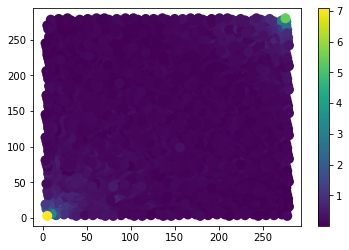

In [99]:
N = len(sublattice.x_position)
pos = np.zeros((N,3))
distances = np.zeros(N)
neighbors = np.zeros(6)
for i in range(0,N):
    pos[i][0] = sublattice.x_position[i]
    pos[i][1] = sublattice.y_position[i]
    pos[i][2] = np.sqrt(pos[i][0]**2 + pos[i][1]**2)
for j in range(0,N):
    posp = np.zeros(N)
    for k in range(0,N):
        posp[k] = abs(pos[j][2] - pos[k][2])
    for l in range(0,6):
        minValue = posp[0]
        minIndex = 0
        for m in range(0,len(posp)):
            if posp[m] < minValue:
                minValue = posp[m]
                minIndex = m
        neighbors[l] = minValue
        posp = np.delete(posp, minIndex)
    distances[j] = np.mean(neighbors)
x = pos[:,0]
y = pos[:,1]
z = distances
fig, ax = p.subplots()
sc = ax.scatter(x, y, c=z, s=100, edgecolor='', linewidths=0.5)
cbar = fig.colorbar(sc)
p.show()

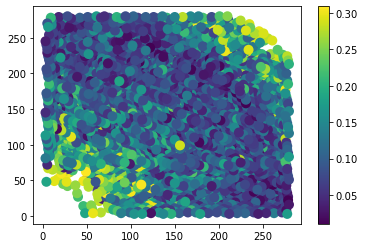

In [97]:
minPosX = min(pos[:,0])
minPosY = min(pos[:,1])
maxPosX = max(pos[:,0])
maxPosY = max(pos[:,1])
minPos = np.sqrt(minPosX**2 + minPosY**2)
maxPos = np.sqrt(maxPosX**2 + maxPosY**2)
media = np.mean(distances)
n = 0
while n < len(distances):
    if distances[n] > media*2:
        pos = np.delete(pos, n, 0)
        distances = np.delete(distances, n)
    else:
        n += 1
x = pos[:,0]
y = pos[:,1]
z = distances
fig, ax = p.subplots()
sc = ax.scatter(x, y, c=z, s=100, edgecolor='', linewidths=0.5)
cbar = fig.colorbar(sc)
p.show()